In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel = pd.read_csv("fuel-econ.csv")
print(fuel.shape)
fuel.head(10)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


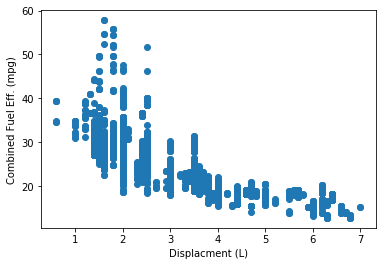

In [3]:
plt.scatter(data = fuel, x = 'displ', y = 'comb');
plt.xlabel('Displacment (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


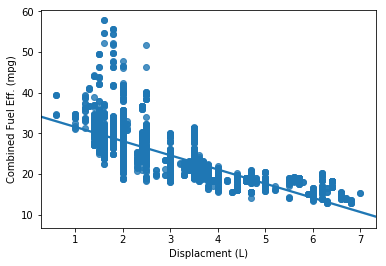

In [4]:
sb.regplot(data = fuel, x = 'displ', y = 'comb');
plt.xlabel('Displacment (L)');
plt.ylabel('Combined Fuel Eff. (mpg)');

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


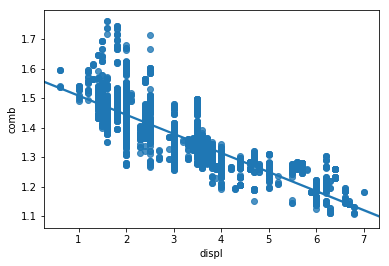

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel['displ'], fuel['comb'].apply(log_trans));


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


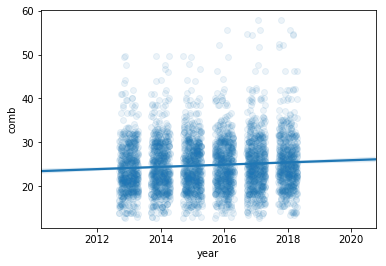

In [6]:
sb.regplot(data = fuel, x = 'year', y = 'comb', x_jitter = 0.3,
          scatter_kws = {'alpha' : 1/12});

In [7]:
fuel[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [8]:
bins_x = np.arange(0.6, 7 + .3, 0.3);
bins_y = np.arange(12, 58 + 3, 3);

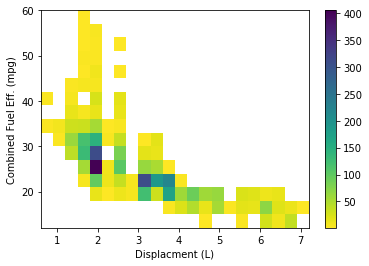

In [9]:
plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacment (L)');
plt.ylabel('Combined Fuel Eff. (mpg)');

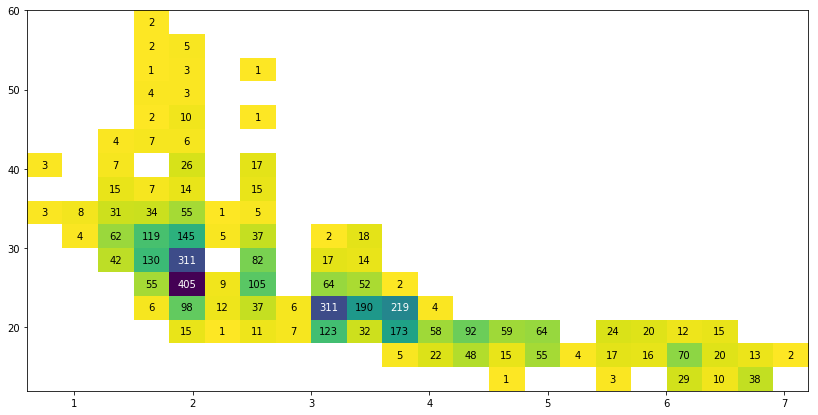

In [10]:
plt.figure(figsize = [14,7])
h2d = plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins = [bins_x, bins_y])
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c > 200:
            plt.text(bins_x[i] + 0.15, bins_y[j] + 1.5, int(c),
                    ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i] + 0.15, bins_y[j] + 1.5, int(c),
                    ha = 'center', va = 'center', color = 'black')

In [14]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel['VClass'] = fuel['VClass'].astype(vclasses);

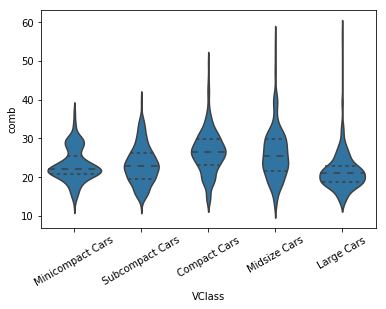

In [29]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel, x = 'VClass', y = 'comb', color = base_color, inner = 'quartile');
plt.xticks(rotation = 30);

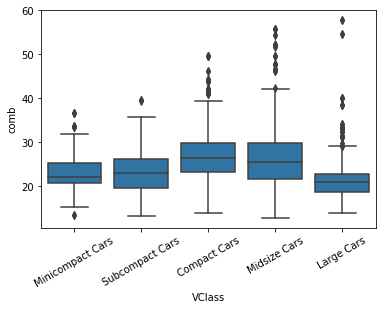

In [26]:
sb.boxplot(data = fuel, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 30);

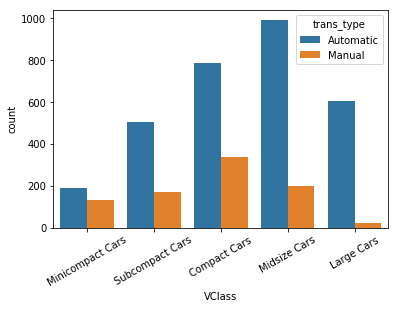

In [35]:
fuel['trans_type'] = fuel['trans'].apply(lambda x: x.split()[0])
pic = sb.countplot(data = fuel, x = 'VClass', hue = 'trans_type')
#pic.legend(loc = 8, ncol = 3, framealpha = 1)
plt.xticks(rotation = 30);

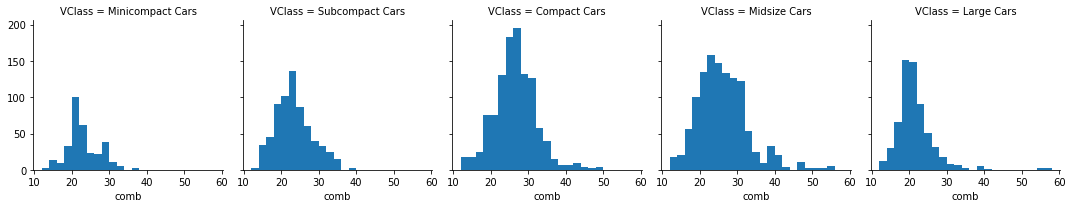

In [38]:
bins_fac = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel, col = "VClass")
g.map(plt.hist, 'comb', bins = bins_fac);

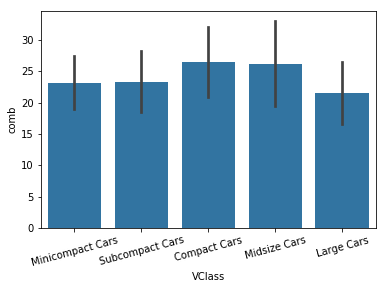

In [50]:
sb.barplot(data = fuel, x = 'VClass', y = 'comb', color = base_color, ci = 'sd');
plt.xticks(rotation = 15);

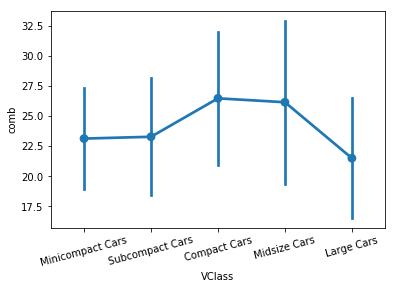

In [52]:
sb.pointplot(data = fuel, x = 'VClass', y = 'comb', ci = 'sd');
plt.xticks(rotation = 15);

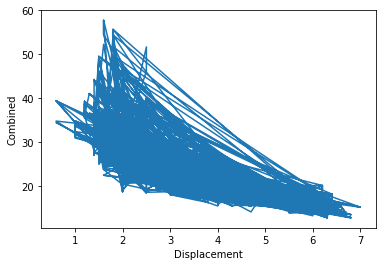

In [54]:
plt.errorbar(data = fuel, x = 'displ', y = 'comb');
plt.xlabel('Displacement');
plt.ylabel('Combined');

In [68]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1
displ_binned = pd.cut(fuel['displ'], bins_e, include_lowest = True)
comb_mean = fuel['comb'].groupby(displ_binned).mean()
comb_std = fuel['comb'].groupby(displ_binned).std()

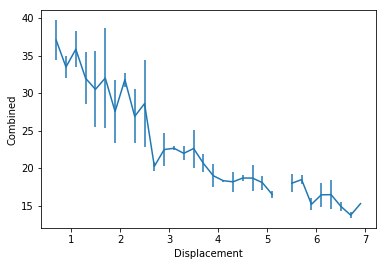

In [69]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);
plt.xlabel('Displacement');
plt.ylabel('Combined');